### Requirements

In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

## Data preprocessing and Data cleansing

In lecture 9 we have worked with a data set, which consists of the height and shoe size of men and women. 

In the exercises further below we want to preprocess and clean the data such that we can use it in lecture 10 to train a prediction model.

In [2]:
shoesize_height = pd.read_csv("data/wo_men.csv")
shoesize_height

,time,gender,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40.0
1,04.10.2016 17:58:59,woman,171.0,39.0
2,04.10.2016 18:00:15,woman,174.0,39.0
3,04.10.2016 18:01:17,woman,176.0,40.0
4,04.10.2016 18:01:22,man,195.0,46.0
...,...,...,...,...
96,17.10.2016 12:37:09,woman,170.0,39.0
97,17.10.2016 13:12:48,woman,183.0,39.0
98,19.10.2016 17:07:53,woman,173.0,40.0
99,29.10.2016 20:28:33,woman,160.0,37.0


In [3]:
def convert_sex(x):
    if x=="woman":
        return 1
    elif x=="man":
        return 0
    else: # in case no data is available
        return None

In [4]:
shoesize_height['gender2'] = shoesize_height['gender'].apply(convert_sex)

In [5]:
shoesize_height

,time,gender,height,shoe_size,gender2
0,04.10.2016 17:58:51,woman,160.0,40.0,1.0
1,04.10.2016 17:58:59,woman,171.0,39.0,1.0
2,04.10.2016 18:00:15,woman,174.0,39.0,1.0
3,04.10.2016 18:01:17,woman,176.0,40.0,1.0
4,04.10.2016 18:01:22,man,195.0,46.0,0.0
...,...,...,...,...,...
96,17.10.2016 12:37:09,woman,170.0,39.0,1.0
97,17.10.2016 13:12:48,woman,183.0,39.0,1.0
98,19.10.2016 17:07:53,woman,173.0,40.0,1.0
99,29.10.2016 20:28:33,woman,160.0,37.0,1.0


## Exercises for lecture 9

**Task a)** Delete the *time* column in the *shoesize_height* dataset.

In [6]:
# this can be executed only once, otherwise an error occurs, 
# because the column time was already deleted
shoesize_height = shoesize_height.drop("time",axis=1)

In [7]:
shoesize_height

,gender,height,shoe_size,gender2
0,woman,160.0,40.0,1.0
1,woman,171.0,39.0,1.0
2,woman,174.0,39.0,1.0
3,woman,176.0,40.0,1.0
4,man,195.0,46.0,0.0
...,...,...,...,...
96,woman,170.0,39.0,1.0
97,woman,183.0,39.0,1.0
98,woman,173.0,40.0,1.0
99,woman,160.0,37.0,1.0


**Task b)** Delete *gender2* and directly convert the string values in *gender* to binary without adding a new column.

In [8]:
shoesize_height = shoesize_height.drop("gender2", axis=1)

shoesize_height['gender'] = shoesize_height['gender'].apply(convert_sex)

In [9]:
shoesize_height

,gender,height,shoe_size
0,1.0,160.0,40.0
1,1.0,171.0,39.0
2,1.0,174.0,39.0
3,1.0,176.0,40.0
4,0.0,195.0,46.0
...,...,...,...
96,1.0,170.0,39.0
97,1.0,183.0,39.0
98,1.0,173.0,40.0
99,1.0,160.0,37.0


**Task c)** Find out if there are missing data values and where they are. 

For this, you can use the methods 

                                data_frame.isna() 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

*Hint: you can use masks here and check for each column*

In [10]:
shoesize_height[shoesize_height['gender'].isna()]

,gender,height,shoe_size
85,NaN,NaN,NaN


**Task d)** Delete the missing data values with the method

                                    data_frame.dropna()
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [11]:
shoesize_height = shoesize_height.dropna()

**Task e)** How many women and how many men are in the data set? What is the maximum and the minimum height and shoe_size per gender? *Hint: you can use masks here*

In [12]:
woman = shoesize_height[shoesize_height['gender'] == 1]

man = shoesize_height[shoesize_height['gender'] == 0]

print(woman.describe())
print()
print(man.describe())

       gender      height  shoe_size
count    82.0   82.000000  82.000000
mean      1.0  161.309512  38.871951
std       0.0   42.782380   5.651292
min       1.0    1.630000  35.000000
25%       1.0  161.250000  37.000000
50%       1.0  168.000000  38.000000
75%       1.0  171.000000  39.000000
max       1.0  364.000000  88.000000

       gender      height  shoe_size
count    18.0   18.000000  18.000000
mean      0.0  183.111111  43.888889
std       0.0    9.958082   2.398256
min       0.0  171.000000  41.000000
25%       0.0  175.750000  42.000000
50%       0.0  181.500000  44.000000
75%       0.0  184.500000  44.000000
max       0.0  206.000000  50.000000


**Task f)** If you have solved the last task, you have probably recognized that some values cannot be correct. 
Now we want to visualize the data in order to further evaluate this issue. 

Make a 2d scatter plot with matplotlib plotting the height on the x-axis and the shoe size on the y-axis and give each gender a different color and a label (just e.g. label="woman" for data from women). 

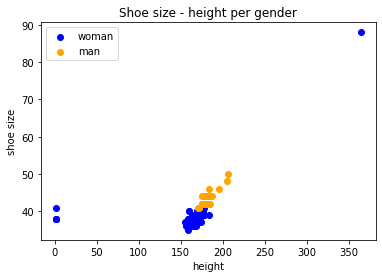

In [13]:
plt.scatter(woman['height'], woman['shoe_size'], c = "blue", label="woman")
plt.scatter(man['height'], man['shoe_size'], c = "orange", label="man")


plt.title("Shoe size - height per gender")
plt.legend()
plt.xlabel("height")
plt.ylabel("shoe size")
plt.show()

**Task g)** Delete the data point with a height above 300.

In [14]:
shoesize_height = shoesize_height[shoesize_height['height']<300]

**Task h)** Analyse the height values which are below 50. What is wrong here? Do a reasonable correction of the data.

In [15]:
row_indexer = shoesize_height['height']<50
col_indexer = ['height']

# height like 1.63 to be tranformed to 163
shoesize_height.loc[row_indexer, col_indexer] *= 100

**Task i)** Now do the same visualisation as in task f)

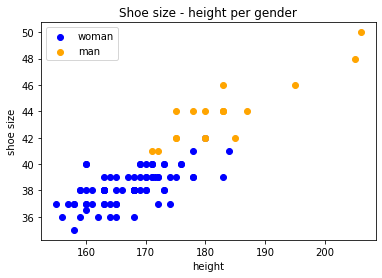

In [16]:
woman = shoesize_height[shoesize_height['gender'] == 1]
man = shoesize_height[shoesize_height['gender'] == 0]

plt.scatter(woman['height'], woman['shoe_size'], c = "blue", label="woman")
plt.scatter(man['height'], man['shoe_size'], c = "orange", label="man")

plt.title("Shoe size - height per gender")
plt.legend()
plt.xlabel("height")
plt.ylabel("shoe size")
plt.show()